<a href="https://colab.research.google.com/github/gen95mis/dataset/blob/main/image_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


![UNet model](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/u-net-architecture.png)

[Source](https://lmb.informatik.uni-freiburg.de/people/ronneber/u-net/)

# Downloading dataset Cityscape

[Cityscapes Image Pairs](https://www.kaggle.com/dansbecker/cityscapes-image-pairs)

In [8]:
import os
if os.path.isdir('./images') == False:
  !wget https://github.com/gen95mis/dataset/raw/main/images-1.zip?raw=true -O images-1.zip
  !wget https://github.com/gen95mis/dataset/raw/main/images-2.zip?raw=true -O images-2.zip
  !wget https://github.com/gen95mis/dataset/raw/main/labels.zip -O labels.zip
  
  !unzip images-1.zip
  !unzip images-2.zip
  !unzip labels.zip

  !rm images-1.zip
  !rm images-2.zip
  !rm labels.zip

  !mkdir images
  !cp -R images-1/* images
  !cp -R images-2/* images

  !rm -rf images-1
  !rm -rf images-2

# 1. Import packages

In [9]:
import tensorflow as tf
import numpy as np 
import glob
from PIL import Image, ImageOps


# 2. The lables mark

In [10]:
from collections import namedtuple

Label = namedtuple( 'Label' , [

    'name'        , # The identifier of this label, e.g. 'car', 'person', ... .
                    # We use them to uniquely name a class

    'id'          , # An integer ID that is associated with this label.
                    # The IDs are used to represent the label in ground truth images
                    # An ID of -1 means that this label does not have an ID and thus
                    # is ignored when creating ground truth images (e.g. license plate).
                    # Do not modify these IDs, since exactly these IDs are expected by the
                    # evaluation server.

    'color'       , # The color of this label
  ] 
)

In [11]:
labels = [
  #       name                     id           color
  Label(  'Void'                  ,  0  ,        [0,0,0] ),
  Label(  'Car'                   ,  1  ,        [0,0,255] ), 
  Label(  'Road'                  ,  2  ,        [255,0,0] ), 
  Label(  'Mark'                  ,  3  ,        [255,255,0] ), 
  Label(  'Building'              ,  4  ,        [0,255,0] ), 
  Label(  'Sidewalk'              ,  5  ,        [255,0,255] ), 
  Label(  'Tree/Bush'             ,  6  ,        [0,255,255] ), 
  Label(  'Pole'                  ,  7  ,        [255,0,153] ), 
  Label(  'Sign'                  ,  8  ,        [153,0,255] ), 
  Label(  'Person'                ,  9  ,        [0,153,255] ),
  Label(  'Wall'                  , 10  ,        [153,255, 0] ),
  Label(  'Sky'                   , 11  ,        [255,153, 0] ),
  Label(  'Curb'                  , 12  ,        [0,255,153] ),
  Label(  'Grass/Dirt'            , 13  ,        [0,153,153] ),
  Label(  'Side rail'             , 14 ,         [153,153,153] ),
  Label(  'Object'                , 15  ,        [0, 0,153] ),
  Label(  'Bicycle/Motorbike'     , 16  ,       [255,255,153] ),

]

# Show image

In [12]:
import matplotlib.pyplot as plt
def show_image(img):
  plt.imshow(img)
  plt.show()

# 3. Processing the images

In [13]:
image_dir = 'images'
image_filenames = os.listdir( image_dir )

labels_dir = 'labels'
labels_filenames = os.listdir( image_dir )

# New Section

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  app.launch_new_instance()


(10,)
(370, 1226, 3)


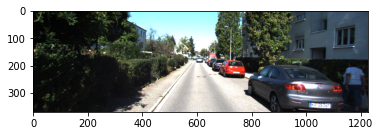

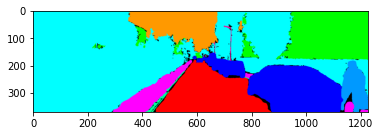

In [18]:
#@markdown > The number of images to load from the dataset. By default 400 images are loaded.
num_images =  10#@param {type: "number" }

x = list() # sorce image
y = list() # label image

for filename in image_filenames[ 0 : num_images ]:
	image = Image.open(os.path.join( image_dir, filename))
	x.append( np.asarray( ImageOps.crop( image ) ) )
 
for filename in labels_filenames[ 0 : num_images ]:
	image = Image.open(os.path.join(labels_dir, filename))
	y.append( np.asarray(image) )
 
x = np.array(x)/255
y = np.array(y)

print(y.shape)
print(y[0].shape)

# our shit
show_image(x[0])
show_image(y[0])

In [15]:
from sklearn.model_selection import train_test_split

#@markdown > Процент проверочных изображений. По умолчанию 0.4
test_size =  0.4#@param {type: "number" }
train_features, test_features, train_labels, test_labels = train_test_split(np.array(x), np.array(y),test_size=test_size)

In [16]:
def mapping( pixel ):
  for l in labels:
    if np.array_equal( pixel , l.color):
      return np.array( [ l.id ] )

print(train_labels.shape)
print(train_labels[0].shape)

train_labels = np.apply_along_axis( mapping , axis=3 , arr=train_labels ) 
test_labels = np.apply_along_axis( mapping , axis=3 , arr=test_labels ) 

(6,)
(376, 1241, 3)


AxisError: ignored

In [ ]:
print(len(train_labels))
print(train_labels[0])